# Tasks

In [38]:
from scipy.stats import chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

## Task 1
### Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places.

## Square Root of 2

To calculate the square root of a number in python you need to use the power operator, x ** y, where x is the number you would like to get the square root of and y is 0.5. This is based on the mathmatical property of $\sqrt{x}$ = $x^{\frac{1}{2}}$, i.e. the square root of a number is equal to that number to the power of ${\frac{1}{2}}$.

Using a common example, we know that $\sqrt{4} = 2$.

Conversely $2^{2} = 4$.

Now raise both to the half power.

$2^{2^\frac{1}{2}} = 4^{\frac{1}{2}}$

When raising a power to another power you multiply them.

$2^{2\times \frac{1}{2}} = 2^1 = 2$

So from this we can infer that $2 = 4^{\frac{1}{2}}$ and subsequently $\sqrt{4} = 4^{\frac{1}{2}}$.

The following function will calculate the square root of 2 and given that the 2 is not a perfect square it will return an irrational number, one that cannot be expressed as a simple fraction. As such the function will return the square root of 2 to 100 places. 

In [108]:
# https://realpython.com/python-square-root-function/

# define function 
def sqrt2():
    
    n = 2  # variable containing the number 2
    
    n_sqrt = n ** 0.5 # variable containing square root of 2 
    
    # print the square root of 2 to 100 places
    print('The square root of %d is %.100f'% (n, n_sqrt))

In [109]:
sqrt2()

The square root of 2 is 1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000


As we can see when we return the square root of 2 to 100 places it stops at 52 places. This is explained in the python documentation and is a result of how floating point numbers are stored in memory. Floating point numbers are represented by binaray numbers in computer hardware. However most decimal fractions cannot be exactly represented in binary. As such an approximation in binary is stored for floating point numbers and this approximation is limited to the first 53 bits. 

### References
 - https://realpython.com/python-square-root-function/
 - https://docs.python.org/3/tutorial/floatingpoint.html

## Task 2
### The Wikipedia article gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

In [4]:
cols = ['A', 'B', 'C', 'D']
data = pd.DataFrame(columns=cols)

data.loc['White Collar'] = [90, 60, 104, 95]
data.loc['Blue Collar'] = [30, 50, 51, 20]
data.loc['No collar'] = [30, 40, 45, 35]

print (data)

               A   B    C   D
White Collar  90  60  104  95
Blue Collar   30  50   51  20
No collar     30  40   45  35


### Chi-Square Test

The [Wikipedia article](https://en.wikipedia.org/wiki/Chi-squared_test) has an example of the chi-squared test where a a random sample of 650 people is taken from a hypothetical city of 1,000,000 residents with with four neighbourhoods. Each resident in this sample is designated white collar, blue collar, or no collar designated based on their occupation. A table based on this is displayed below. 

In [5]:
stat, p, dof, expected = chi2_contingency(data)
print(round(stat,1))

24.6


Running the [chi2 contingency test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) from scipy.stats yields the same result as the wikipedia article, 24.6. This result will examined in closer detail below by calculating the expected values for blue collar workers, white collar workers, and no collar workers and calculating the chi-square values of each category to see if the correlate with this result.

In [6]:
print(p)

0.0004098425861096696


The first step is to calculate the expected values for each "collar". This is done by multiplying the total of a neighbourhood by the total of a collar divided by the overall total sampled, 650. A chi-squared test is then run on the actual values against the expected values. 

### White Collar 

In [7]:
ex_A = round(150 * 349 / 650, 2)
ex_B = round(150 * 349 / 650, 2)
ex_C = round(200 * 349 / 650, 2)
ex_D = round(150 * 349 / 650, 2)

ex_W = [ex_A, ex_B, ex_C, ex_D]

ex_W

[80.54, 80.54, 107.38, 80.54]

In [8]:
chisquare([90, 60, 104, 95], f_exp=[80.54, 80.54, 107.38, 80.54])

Power_divergenceResult(statistic=9.051944772302694, pvalue=0.0286081655305345)

### Blue Collar

In [9]:
ex_A = round(150 * 151 / 650, 2)
ex_B = round(150 * 151 / 650, 2)
ex_C = round(200 * 151 / 650, 2)
ex_D = round(150 * 151 / 650, 2)

ex_B = [ex_A, ex_B, ex_C, ex_D]

ex_B

[34.85, 34.85, 46.46, 34.85]

In [10]:
chisquare([30, 50, 51,20], f_exp=[34.85, 34.85, 46.46, 34.85])

Power_divergenceResult(statistic=14.032379288643106, pvalue=0.002861408674466977)

### No Collar

In [11]:
ex_A = round(150 * 150 / 650, 2)
ex_B = round(150 * 150 / 650, 2)
ex_C = round(200 * 150 / 650, 2)
ex_D = round(150 * 150 / 650, 2)

ex_N = [ex_A, ex_B, ex_C, ex_D]

ex_N

[34.62, 34.62, 46.15, 34.62]

In [12]:
chisquare([30, 40, 45, 35], f_exp =[34.62, 34.62, 46.15, 34.62])

Power_divergenceResult(statistic=1.4854214305072317, pvalue=0.6856391210459625)

In [13]:
white_collar = 9.051944772302694
blue_collar = 14.032379288643106
no_collar = 1.4854214305072317
cs = round(white_collar + blue_collar + no_collar, 1)
cs

24.6

### References
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

## Task 3
### Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.

## Standard Deviation

In [138]:
# generated random sample from np.random

pop = np.random.normal(scale = 6.8, size = 10000) # generated population with standard deviation of 6.8


The difference between STDEV.p and STDEV.s is that STDEV.s applies [Bessel's Correction](http://mathcenter.oxford.emory.edu/site/math117/besselCorrection/) of n-1.

As taken from the tasks instruction, the standard deviation, in this case STDEV.p, of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).

In the case of STDEV.s, the standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)-1).

The standard deviation is a measure of variation in a given set of values. A random sample of 100 values was generated in the normal distribution as the standard deviation would be expected to be 1. 

STDEV.p can be used to calculate the standard deviation of the sample. However, if this sample were part of a greater population the standardard deviation would be biased towards the sample. This means that observations of the sample mean will differ from the population mean unless the distribution of both was identical, which is highly unlikely. STDEV.s applies Bessel's correction to address this bias and allows extrapolation of the mean as to how it applies to the greater population. As such STDEV.p is best applied to a whole population while STDEV.s is best applied to a sample of the population.

In [166]:
# applied numpy standard deviation 
np.std(pop) 

6.7238998237092655

In [167]:
# gathered random sample of population of size 1000
sample = np.random.choice(pop, 1000)

In [170]:
sdp = np.sqrt(np.sum((xsample - np.mean(sample))**2)/len(sample))
sdp

6.500893193578381

In [171]:
sds = np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))
sds

6.810719286484907

As seen above, the standard deviation when calculated with STDEV.s is more accurate than STDEV.p when applied to a population sample.

### References
 - http://mathcenter.oxford.emory.edu/site/math117/besselCorrection/

## Task 4
### Use scikit-learn to apply k Nearest Neighbours clustering to Fisher’s famous Iris data set.

## k Nearest Neighbour

<Figure size 576x432 with 0 Axes>

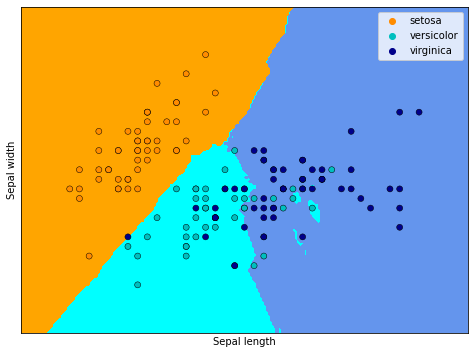

In [86]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

# import iris dataset 
iris = datasets.load_iris()



# Only take the first two features of dataset, sepal length and seal width 
X = iris.data[:, :2]
y = iris.target

knn = KNeighborsClassifier(n_neighbors = 15)

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, y)

# Plot the decision boundary. For that, we will asign a colour to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

This first plot displays the decision boundaries used in k Nearest Neighbour for predicting species based on sepal length and width. Results that fall with the orange section are attributed to setosa, dark blue are attributed to virginica and cyan are attributed to versicolor. Next we will split the dataset in 75% training data and 25% test data using train_test_split from sklearn.model_selection. We will then determine the accuracy of of the model.

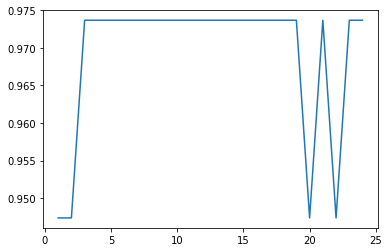

In [101]:
# https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4) # test size set for 25%


k_range = range(1, 25)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

plt.plot(k_range, scores_list)
plt.show()

As evident by this graph, when predicting the species of iris flower it is most accurate with between around 3 and 19 neighbours. For this reason we will set the number of neighbours to 10.

In [102]:
# set neigbours to 10 
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=11)

In [103]:
classes = {0:'setosa', 1:'versicolor', 2:'virginia'}

# plugged in known sepal length and widths to confirm that accurate prediction made.
x_new = [[5.4, 3.7, 1.5, 0.2], # setosa
         [5.2, 2.7, 3.9, 1.4], # versicolor
         [7.3, 2.9, 6.3, 1.8]  # virgina
        ]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])
print(classes[y_predict[2]])

setosa
versicolor
virginia


As we can see, the model has correctly predicted each of these examples.

### References
 - https://scikit-learn.org/stable/modules/neighbors.html
 - https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
 - https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75